# Teste de hipóteses de Redes Sociais

Alunos: 

- Lívia Makuta;
- Henrique Frezzatti;
- Rodrigo Guimarães.


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import openpyxl

# Leitura da base de dados

In [92]:
data = pd.read_excel('./final_db.xlsx')
data

,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,idh_2007,...,n_neightbours,idh_avg,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,inverse_rejected
0,0,"China, Hong Kong SAR",0.83,0.838,0.845,0.854,0.865,0.874,0.886,0.89,...,1,0.889235,7767,2.861034e-04,0,0.240278,830,16,9.654531,0.000129
1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,1,0.922000,7,8.704008e-07,0,0.098611,10,3,58.823529,0.142857
2,2,Afghanistan,0.35,0.353,0.384,0.393,0.409,0.418,0.429,0.447,...,6,0.442706,243,2.351135e-03,0,0.120833,249,239198,50.609756,0.004115
3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,0.722,...,4,0.732412,64,1.306107e-03,0,0.218056,158,14660,71.171171,0.015625
4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.69,0.7,...,7,0.699882,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0,0.763000,0,0.000000e+00,0,0.045833,0,0,0.000000,0.000000
221,221,Western Sahara,..,..,..,..,..,..,..,..,...,3,0.000000,0,0.000000e+00,0,0.004167,0,473,0.000000,0.000000
222,222,Yemen,0.444,0.453,0.461,0.47,0.477,0.483,0.488,0.492,...,2,0.485235,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0.000175
223,223,Zambia,0.425,0.432,0.441,0.451,0.46,0.471,0.482,0.488,...,8,0.502235,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0.000407


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        225 non-null    int64  
 1   country           225 non-null    object 
 2   idh_2000          225 non-null    object 
 3   idh_2001          225 non-null    object 
 4   idh_2002          225 non-null    object 
 5   idh_2003          225 non-null    object 
 6   idh_2004          225 non-null    object 
 7   idh_2005          225 non-null    object 
 8   idh_2006          225 non-null    object 
 9   idh_2007          225 non-null    object 
 10  idh_2008          225 non-null    object 
 11  idh_2009          225 non-null    object 
 12  idh_2010          225 non-null    object 
 13  idh_2011          225 non-null    object 
 14  idh_2012          225 non-null    object 
 15  idh_2013          225 non-null    object 
 16  idh_2014          225 non-null    object 
 1

In [94]:
data_certo = data['coreness'].apply(lambda x: 0 if x < 0.3 else 1 if x > 0.7 else x)

data["coreness_discreto"] = data_certo
data

,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,idh_2007,...,idh_avg,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,inverse_rejected,coreness_discreto
0,0,"China, Hong Kong SAR",0.83,0.838,0.845,0.854,0.865,0.874,0.886,0.89,...,0.889235,7767,2.861034e-04,0,0.240278,830,16,9.654531,0.000129,0
1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,0.922000,7,8.704008e-07,0,0.098611,10,3,58.823529,0.142857,0
2,2,Afghanistan,0.35,0.353,0.384,0.393,0.409,0.418,0.429,0.447,...,0.442706,243,2.351135e-03,0,0.120833,249,239198,50.609756,0.004115,0
3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,0.722,...,0.732412,64,1.306107e-03,0,0.218056,158,14660,71.171171,0.015625,0
4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.69,0.7,...,0.699882,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0.000181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0.763000,0,0.000000e+00,0,0.045833,0,0,0.000000,0.000000,0
221,221,Western Sahara,..,..,..,..,..,..,..,..,...,0.000000,0,0.000000e+00,0,0.004167,0,473,0.000000,0.000000,0
222,222,Yemen,0.444,0.453,0.461,0.47,0.477,0.483,0.488,0.492,...,0.485235,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0.000175,0
223,223,Zambia,0.425,0.432,0.441,0.451,0.46,0.471,0.482,0.488,...,0.502235,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0.000407,0


## CRIT, CORE, CONP = EXT 

Crit: Estado crítico -> número de guerras.

Core: Coreness.

Conp: Contenção populacional

Ext: peso do out degree.

In [95]:
result_hip1 = reg.linear(data=data, formula='out_degree ~ n_wars + coreness + pop_cont')
result_hip1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             out_degree   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     12.38
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.63e-07
Time:                        14:01:23   Log-Likelihood:                -2755.5
No. Observations:                 225   AIC:                             5519.
Df Residuals:                     221   BIC:                             5533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7058.1272   4831.496      1.461      0.145   -2463.574    1.66e+04
n_wars      3.208e+04   5680.109      5.649      0.000    2.09e+04    4.33e+04
coreness    3333.4709   1.11e+04      0.300      0.764   -1.86e+04    2.52e+04
pop_cont    2.441e+04   1.29e+04      1.893      0.060    -997.640    4.98e+04
==============================================================================
Omnibus:                      264.213   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11318.101
Skew:                           4.944   Prob(JB):                         0.00
Kurtosis:                      36.309   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
result_hip1.nano_summary()

+32084.362 (5680.109) ***
+03333.471 (11108.618)
+24410.843 (12892.757) *


### Gráfico de resíduos

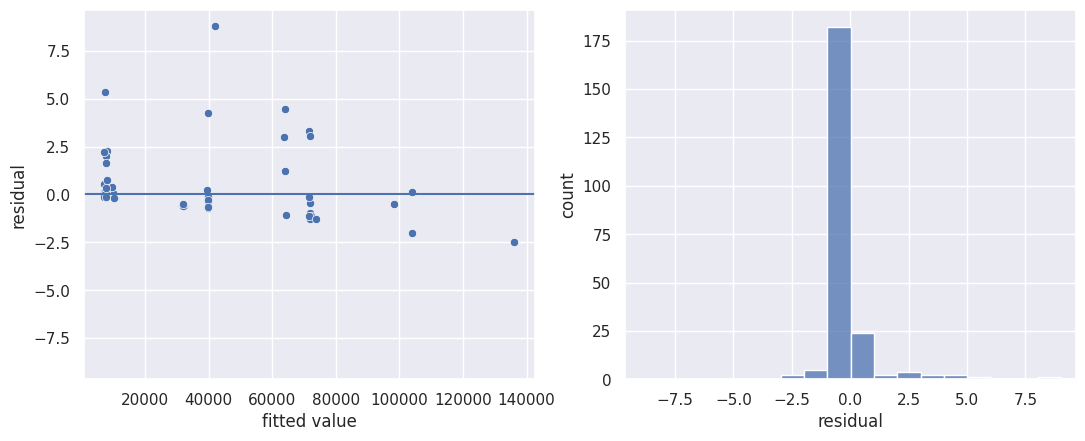

In [97]:
result_hip1.plot_residuals()

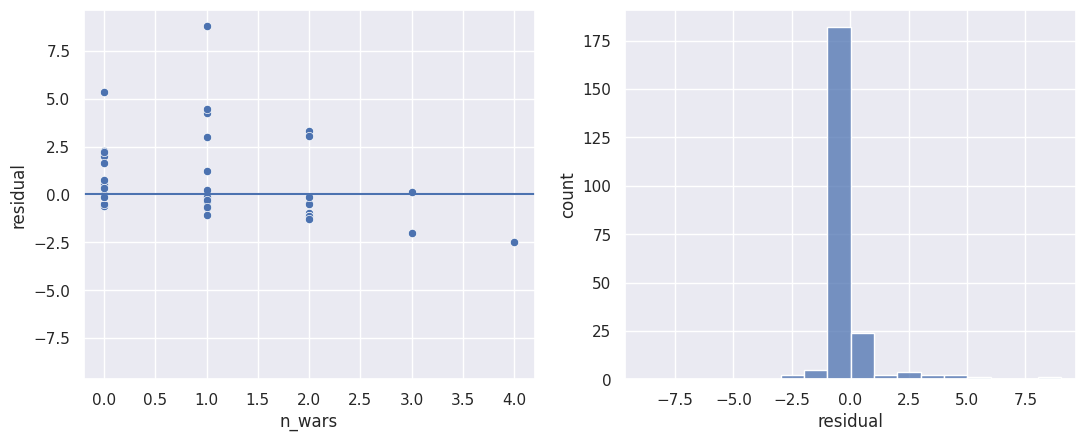

In [98]:
result_hip1.plot_residuals(data['n_wars'])

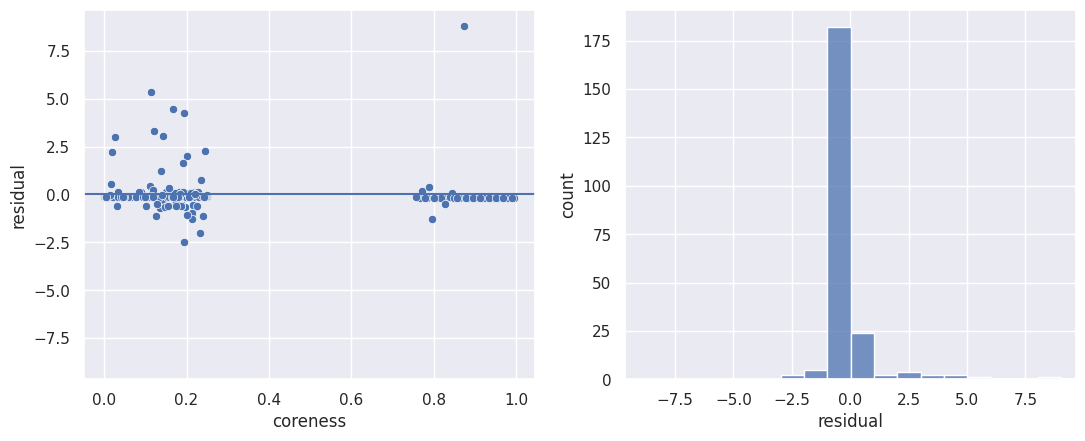

In [99]:
result_hip1.plot_residuals(data['coreness'])

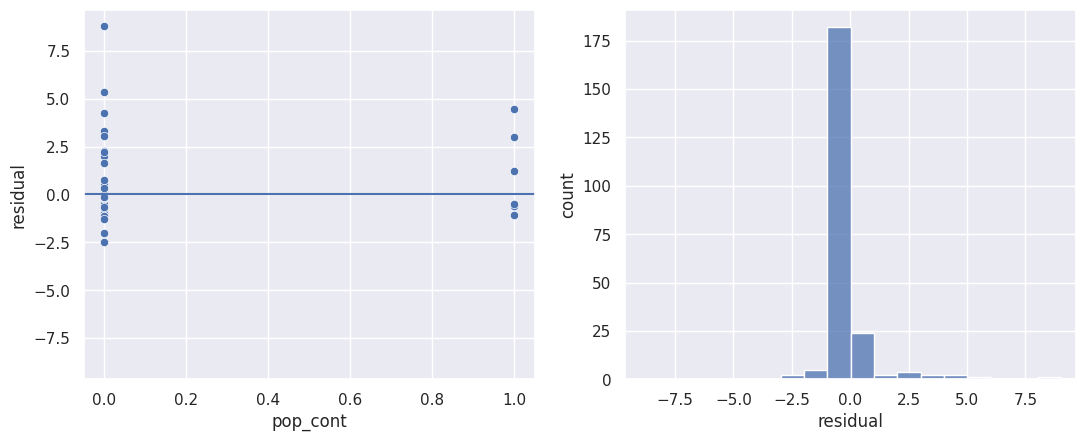

In [100]:
result_hip1.plot_residuals(data['pop_cont'])

## GEO = CORE 

OBS: Vamos ter que tacar uma logística e mudar para algoritmo discreto no coreness.

Geo: Localização - a quantidade de países vizinhos.

Core: Coreness. (variável dependente)

In [101]:
result_hip2 = reg.logistic(data=data, formula='coreness_discreto ~ n_neightbours')
result_hip2.summary()

Optimization terminated successfully.
         Current function value: 0.468595
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      coreness_discreto   No. Observations:                  225
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                 0.05177
Time:                        14:02:01   Log-Likelihood:                -105.43
converged:                       True   LL-Null:                       -111.19
Covariance Type:            nonrobust   LLR p-value:                 0.0006911
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0816      0.283     -7.362      0.000      -2.636      -1.527
n_neightbours     0.2031      0.062      3.291      0.001       0.082       0.324
=================================================================================
"""

In [102]:
result_hip2.nano_summary()

+0.203 (0.062) ***


### Gráfico de resíduos

93.33% of average residuals inside


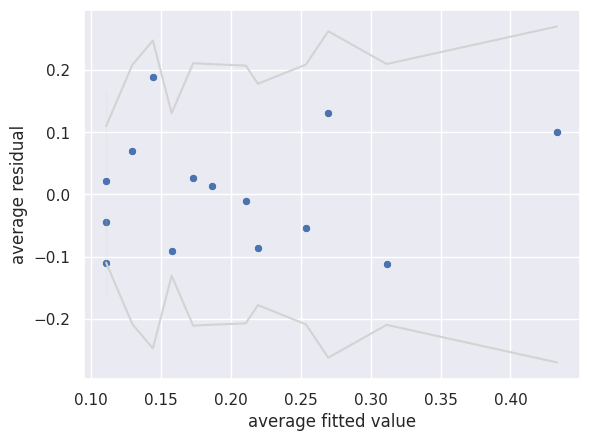

In [103]:
result_hip2.plot_residuals()

## DSV, CORE, CONP = EXT 

DSV: Desenvolvimento -> IDH

Core: Coreness.

Conp: Contenção populacional

Ext: peso do out degree.

In [105]:
result_hip3 = reg.linear(data=data, formula='np.log1p(out_degree) ~ idh_avg + coreness + pop_cont')
result_hip3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log1p(out_degree)   R-squared:                       0.108
Model:                              OLS   Adj. R-squared:                  0.096
Method:                   Least Squares   F-statistic:                     8.953
Date:                  Mon, 31 Oct 2022   Prob (F-statistic):           1.27e-05
Time:                          14:02:46   Log-Likelihood:                -591.14
No. Observations:                   225   AIC:                             1190.
Df Residuals:                       221   BIC:                             1204.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2802      0.693     11.940      0.000       6.914       9.647
idh_avg       -4.7982      1.114     -4.306      0.000      -6.994      -2.602
coreness       1.7092      0.821      2.082      0.038       0.091       3.327
pop_cont       2.9820      0.863      3.456      0.001       1.281       4.683
==============================================================================
Omnibus:                        6.855   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.605
Skew:                          -0.372   Prob(JB):                       0.0368
Kurtosis:                       2.611   Cond. No.                         7.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
result_hip3.nano_summary()

-4.798 (1.114) ***
+1.709 (0.821) **
+2.982 (0.863) ***


### Gráfico de resíduos

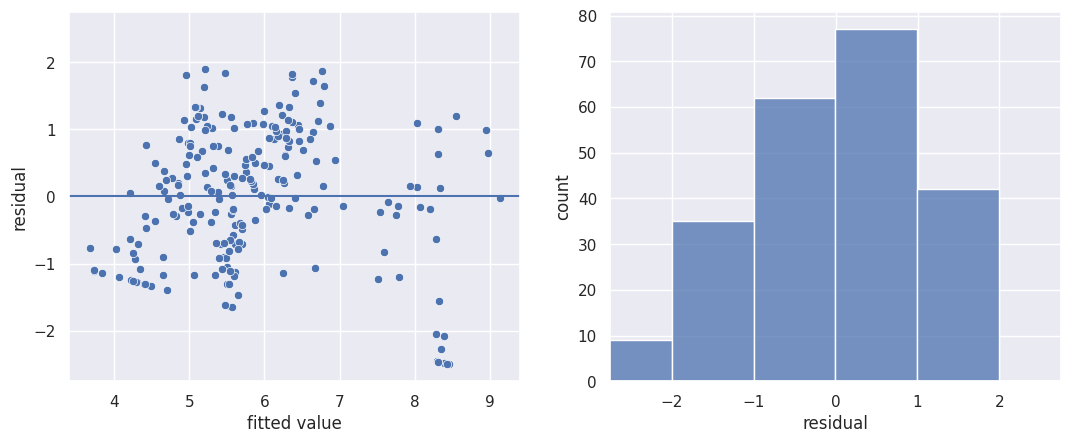

In [107]:
result_hip3.plot_residuals()

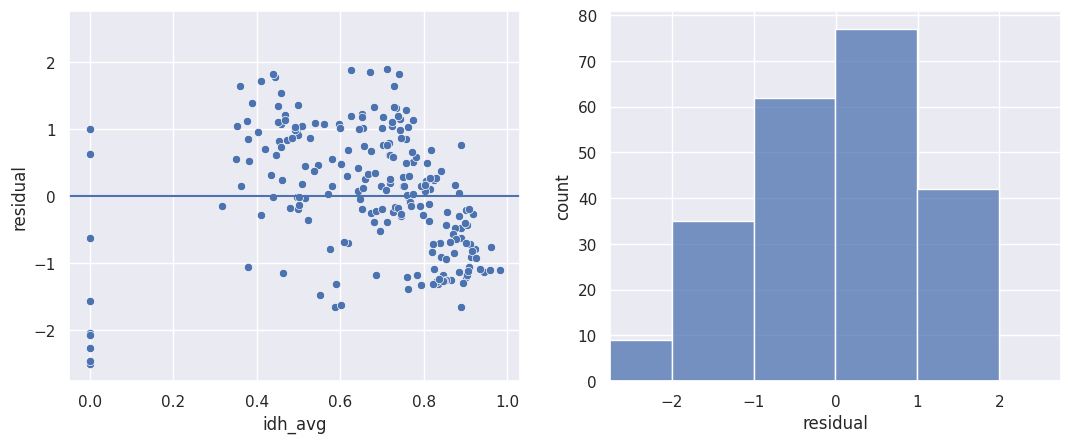

In [108]:
result_hip3.plot_residuals(data['idh_avg'])

## CRIT = CORE

CRIT: Estado crítico -> número de guerras

Core: Coreness.



In [109]:
result_hip4 = reg.logistic(data=data, formula='coreness_discreto ~ n_wars')
result_hip4.summary()

Optimization terminated successfully.
         Current function value: 0.490870
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      coreness_discreto   No. Observations:                  225
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                0.006695
Time:                        14:02:56   Log-Likelihood:                -110.45
converged:                       True   LL-Null:                       -111.19
Covariance Type:            nonrobust   LLR p-value:                    0.2224
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3471      0.175     -7.694      0.000      -1.690      -1.004
n_wars        -0.4133      0.378     -1.095      0.274      -1.153       0.327
==============================================================================
"""

In [110]:
result_hip4.nano_summary()

-0.413 (0.378)


### Gráfico de resíduos



93.33% of average residuals inside


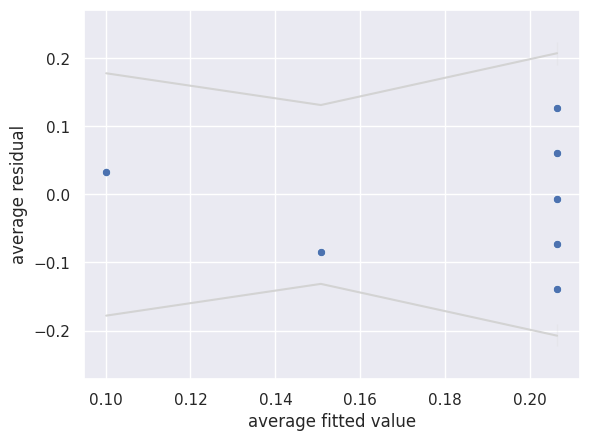

In [111]:
result_hip4.plot_residuals()

## CRIT, DSV, CORE, CONP = EXT 

CRIT: Estado crítico -> número de guerras

DSV: Desenvolvimento -> IDH

Core: Coreness.

Conp: Contenção populacional

Ext: peso do out degree.

In [112]:
result_hip5 = reg.linear(data=data, formula='np.log1p(out_degree) ~ n_wars + idh_avg + coreness + pop_cont')
result_hip5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log1p(out_degree)   R-squared:                       0.240
Model:                              OLS   Adj. R-squared:                  0.226
Method:                   Least Squares   F-statistic:                     17.37
Date:                  Mon, 31 Oct 2022   Prob (F-statistic):           2.13e-12
Time:                          14:03:07   Log-Likelihood:                -573.18
No. Observations:                   225   AIC:                             1156.
Df Residuals:                       220   BIC:                             1173.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1788      0.666     10.779      0.000       5.866       8.491
n_wars         2.1914      0.355      6.173      0.000       1.492       2.891
idh_avg       -3.6298      1.048     -3.462      0.001      -5.696      -1.564
coreness       1.4406      0.761      1.894      0.060      -0.059       2.940
pop_cont       2.5133      0.802      3.133      0.002       0.933       4.094
==============================================================================
Omnibus:                        6.453   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.234
Skew:                          -0.277   Prob(JB):                       0.0730
Kurtosis:                       2.498   Cond. No.                         7.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
result_hip5.nano_summary()

+2.191 (0.355) ***
-3.630 (1.048) ***
+1.441 (0.761) *
+2.513 (0.802) ***


### Gráfico de resíduos


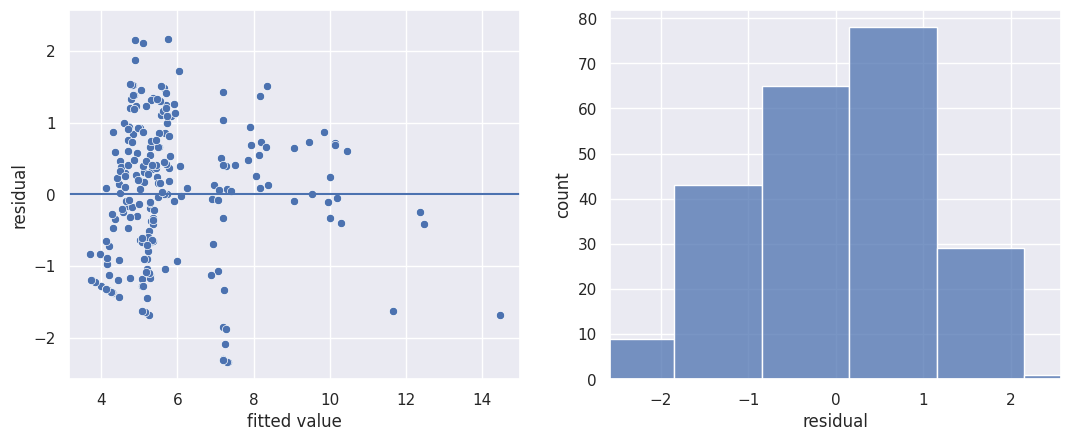

In [114]:
result_hip5.plot_residuals()

## GEO, CRIT = CORE

Geo: Localização - a quantidade de países vizinhos.

CRIT: Estado crítica -> número de guerras.

Core: Coreness. (variável dependente)


In [115]:
result_hip6 = reg.logistic(data=data, formula='coreness_discreto ~ n_wars +  n_neightbours')
result_hip6.summary()

Optimization terminated successfully.
         Current function value: 0.457034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      coreness_discreto   No. Observations:                  225
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                 0.07516
Time:                        14:03:17   Log-Likelihood:                -102.83
converged:                       True   LL-Null:                       -111.19
Covariance Type:            nonrobust   LLR p-value:                 0.0002346
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0993      0.289     -7.273      0.000      -2.665      -1.534
n_wars           -0.8766      0.455     -1.925      0.054      -1.769       0.016
n_neightbours     0.2512      0.068      3.710      0.000       0.119       0.384
=================================================================================
"""

In [116]:
result_hip6.nano_summary()

-0.877 (0.455) *
+0.251 (0.068) ***


### Gráfico de resíduos

93.33% of average residuals inside


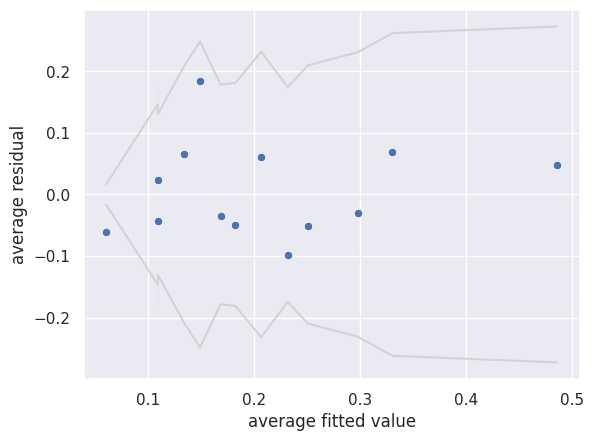

In [117]:
result_hip6.plot_residuals()

## GEO  =  BW

Geo : Localização -> a quantidade de países vizinhos

BW : Betweenness.


In [125]:
result_hip7 = reg.linear(data=data, formula='betweenness ~ n_neightbours')
result_hip7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     15.39
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           0.000116
Time:                        14:06:19   Log-Likelihood:                 748.64
No. Observations:                 225   AIC:                            -1493.
Df Residuals:                     223   BIC:                            -1486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0012      0.001      1.392      0.165      -0.000       0.003
n_neightbours     0.0008      0.000      3.923      0.000       0.000       0.001
==============================================================================
Omnibus:                      315.387   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26679.267
Skew:                           6.402   Prob(JB):                         0.00
Kurtosis:                      54.786   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
result_hip7.nano_summary()

+0.001 (0.000) ***


### Gráfico de resíduos

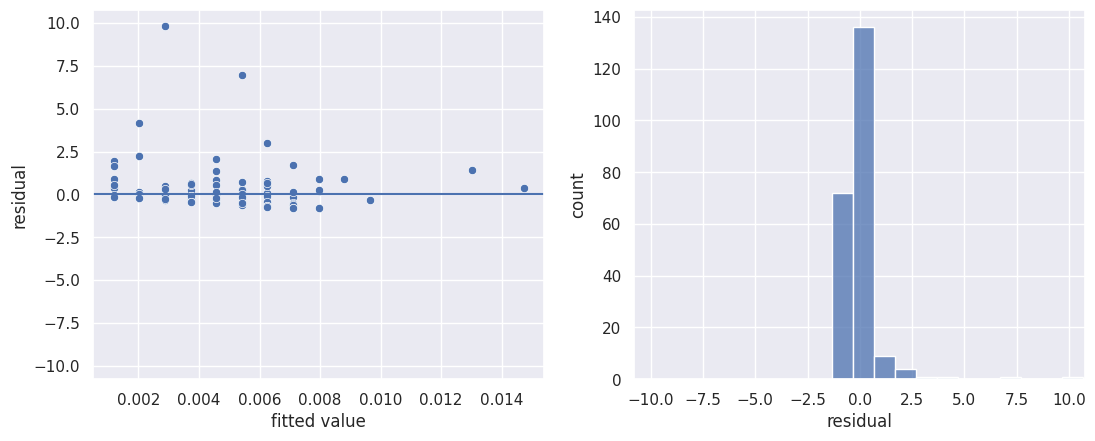

In [127]:
result_hip7.plot_residuals()

### OPEN, EXT, CORE = IN

OPEN: Abertura de um país (número de rejeições)

EXT : peso do out degree.
    
Core : coreness

IN: peso do in-degree

In [143]:
result_hip8= reg.linear(data=data, formula='np.log1p(in_degree) ~ open + out_degree + coreness')
result_hip8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(in_degree)   R-squared:                       0.653
Model:                             OLS   Adj. R-squared:                  0.648
Method:                  Least Squares   F-statistic:                     138.6
Date:                 Mon, 31 Oct 2022   Prob (F-statistic):           1.56e-50
Time:                         14:09:26   Log-Likelihood:                -505.60
No. Observations:                  225   AIC:                             1019.
Df Residuals:                      221   BIC:                             1033.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6836      0.288      2.371      0.019       0.116       1.252
open           0.0639      0.005     13.841      0.000       0.055       0.073
out_degree  4.449e-06   2.84e-06      1.566      0.119   -1.15e-06       1e-05
coreness       8.3465      0.508     16.438      0.000       7.346       9.347
==============================================================================
Omnibus:                        3.243   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.876
Skew:                          -0.223   Prob(JB):                        0.237
Kurtosis:                       3.328   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
result_hip8.nano_summary()

+0.064 (0.005) ***
+0.000 (0.000)
+8.347 (0.508) ***


### Gráfico de resíduos

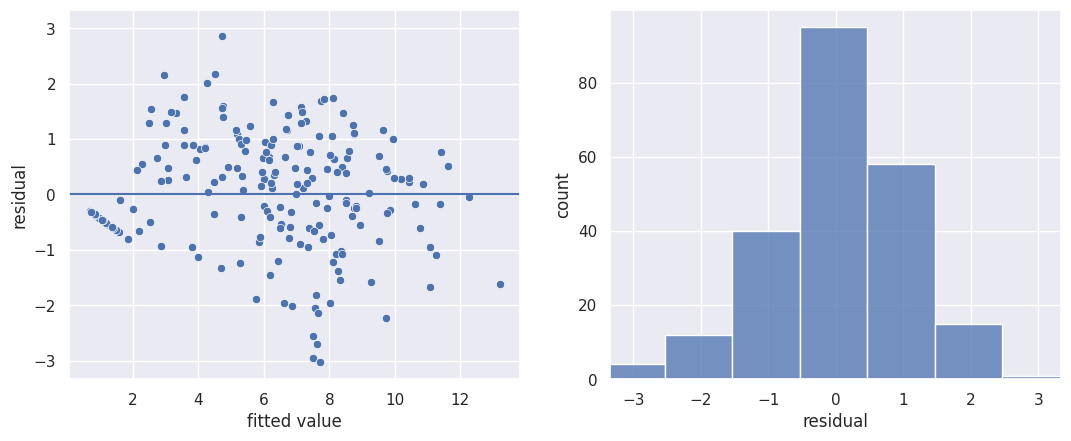

In [145]:
result_hip8.plot_residuals()